In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
test_ids = test_data["PassengerId"]

In [3]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<AxesSubplot:xlabel='Transported', ylabel='count'>

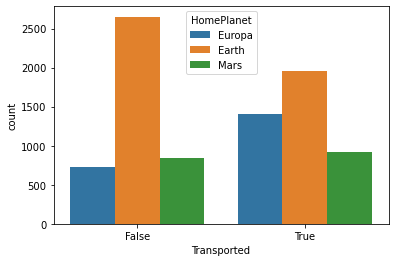

In [4]:
sns.countplot(x="Transported", data=train_data, hue="HomePlanet")


<AxesSubplot:xlabel='Age', ylabel='Count'>

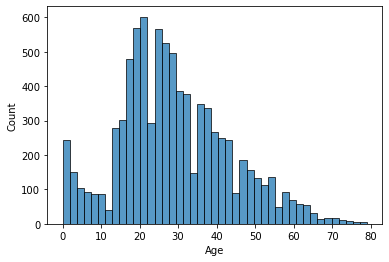

In [5]:
sns.histplot(train_data["Age"], kde=False)


In [6]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
vip = pd.get_dummies(train_data['VIP'], drop_first=True)
vip2 = pd.get_dummies(test_data['VIP'], drop_first=True)

transported = pd.get_dummies(train_data['Transported'], drop_first=True)

cryosleep = pd.get_dummies(train_data['CryoSleep'], drop_first=True)
cryosleep2 = pd.get_dummies(test_data['CryoSleep'], drop_first=True)

homeplanet = pd.get_dummies(train_data["HomePlanet"], drop_first=True)
homeplanet2 = pd.get_dummies(test_data["HomePlanet"], drop_first=True)

destination = pd.get_dummies(train_data["Destination"], drop_first=True)
destination2 = pd.get_dummies(test_data["Destination"], drop_first=True)

In [8]:
train_data.drop(["HomePlanet", "Destination"], axis=1, inplace=True)
test_data.drop(["HomePlanet", "Destination"], axis=1, inplace=True)

In [9]:
train_data = pd.concat([train_data, homeplanet, destination], axis=1)
test_data = pd.concat([test_data, homeplanet2, destination2], axis=1)

In [10]:
train_data

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Europa,Mars,PSO J318.5-22,TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,1
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,1
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,0,1
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,0,1
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,A/98/P,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,0,0,0
8689,9278_01,True,G/1499/S,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,0,1,0
8690,9279_01,False,G/1500/S,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,0,0,1
8691,9280_01,False,E/608/S,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,0,0,0


In [11]:
train_data.isnull().sum()

PassengerId        0
CryoSleep        217
Cabin            199
Age              179
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
Europa             0
Mars               0
PSO J318.5-22      0
TRAPPIST-1e        0
dtype: int64

In [12]:
train_data.drop(["VIP"],axis=1, inplace=True)
test_data.drop(["VIP"],axis=1, inplace=True)

train_data = pd.concat([train_data,vip], axis=1)
test_data = pd.concat([test_data,vip2], axis=1)

In [13]:
train_data

,PassengerId,CryoSleep,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,True
0,0001_01,False,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,1,0
1,0002_01,False,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,1,0
2,0003_01,False,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,0,1,1
3,0003_02,False,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,0,1,0
4,0004_01,False,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,0,0,0,1
8689,9278_01,True,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,0,1,0,0
8690,9279_01,False,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,0,0,1,0
8691,9280_01,False,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,0,0,0,0


In [14]:
train_data.columns = ['PassengerId','CryoSleep', 'Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'Europa', 'Mars', 'PSO J318.5-22', 'TRAPPIST-1e', 'VIPTrue']
test_data.columns = ['PassengerId','CryoSleep', 'Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Europa', 'Mars', 'PSO J318.5-22', 'TRAPPIST-1e', 'VIPTrue']

In [15]:
train_data

,PassengerId,CryoSleep,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,VIPTrue
0,0001_01,False,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,1,0
1,0002_01,False,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,1,0
2,0003_01,False,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,0,1,1
3,0003_02,False,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,0,1,0
4,0004_01,False,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,0,0,0,1
8689,9278_01,True,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,0,1,0,0
8690,9279_01,False,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,0,0,1,0
8691,9280_01,False,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,0,0,0,0


In [16]:
train_data.drop(["CryoSleep"], inplace=True, axis=1)
test_data.drop(["CryoSleep"], inplace=True, axis=1)

train_data = pd.concat([train_data, cryosleep], axis=1)
test_data = pd.concat([test_data, cryosleep2], axis=1)

In [17]:
train_data

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,VIPTrue,True
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,1,0,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,1,0,0
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,0,1,1,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,0,1,0,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,0,0,0,1,0
8689,9278_01,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,0,1,0,0,1
8690,9279_01,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,0,0,1,0,0
8691,9280_01,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,0,0,0,0,0


In [18]:
train_data.columns = ['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'Europa', 'Mars', 'PSO J318.5-22', 'TRAPPIST-1e', 'VIPTrue', 'CryoSleepTrue']
test_data.columns = ['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Europa', 'Mars', 'PSO J318.5-22', 'TRAPPIST-1e', 'VIPTrue', 'CryoSleepTrue']

In [19]:
train_data

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,VIPTrue,CryoSleepTrue
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,1,0,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,1,0,0
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,0,1,1,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,0,1,0,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,0,0,0,1,0
8689,9278_01,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,0,1,0,0,1
8690,9279_01,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,0,0,1,0,0
8691,9280_01,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,0,0,0,0,0


In [20]:
train_data.drop(["Transported"], axis=1, inplace=True)


train_data = pd.concat([train_data, transported], axis=1)


In [21]:
train_data.columns = ['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Europa', 'Mars', 'PSO J318.5-22', 'TRAPPIST-1e', 'VIPTrue', 'CryoSleepTrue','Transported']

In [22]:
train_data

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,VIPTrue,CryoSleepTrue,Transported
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,0,0,1,0,0,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0,0,0,1,0,0,1
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,1,0,0,1,1,0,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,0,0,1,0,0,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,1,0,0,0,1,0,0
8689,9278_01,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0,1,0,0,1,0
8690,9279_01,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,0,0,0,1,0,0,1
8691,9280_01,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,1,0,0,0,0,0,0


In [23]:
train_data.drop(["PassengerId", "Cabin", "Name"],axis=1, inplace=True)
test_data.drop(["PassengerId", "Cabin", "Name"],axis=1, inplace=True)

In [24]:
train_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,VIPTrue,CryoSleepTrue,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,1,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1,1,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0,1,0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,0,1,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0,0,0,0


In [25]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,VIPTrue,CryoSleepTrue,Transported
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.245140,0.202347,0.091568,0.680433,0.022892,0.349362,0.503624
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.430195,0.401772,0.288432,0.466336,0.149568,0.476796,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
train_data["Age"].fillna(value=train_data["Age"].mean(), inplace=True)
test_data["Age"].fillna(value=test_data["Age"].mean(), inplace=True)

In [27]:
train_data.isnull().sum()

Age                0
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Europa             0
Mars               0
PSO J318.5-22      0
TRAPPIST-1e        0
VIPTrue            0
CryoSleepTrue      0
Transported        0
dtype: int64

In [28]:
train_data["RoomService"].fillna(value=train_data["RoomService"].mean(), inplace=True)
test_data["RoomService"].fillna(value=test_data["RoomService"].mean(), inplace=True)

train_data["FoodCourt"].fillna(value=train_data["FoodCourt"].mean(), inplace=True)
test_data["FoodCourt"].fillna(value=test_data["FoodCourt"].mean(), inplace=True)

train_data["ShoppingMall"].fillna(value=train_data["ShoppingMall"].mean(), inplace=True)
test_data["ShoppingMall"].fillna(value=test_data["ShoppingMall"].mean(), inplace=True)

train_data["Spa"].fillna(value=train_data["Spa"].mean(), inplace=True)
test_data["Spa"].fillna(value=test_data["Spa"].mean(), inplace=True)

train_data["VRDeck"].fillna(value=train_data["VRDeck"].mean(), inplace=True)
test_data["VRDeck"].fillna(value=test_data["VRDeck"].mean(), inplace=True)

In [29]:
train_data.isnull().sum()

Age              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Europa           0
Mars             0
PSO J318.5-22    0
TRAPPIST-1e      0
VIPTrue          0
CryoSleepTrue    0
Transported      0
dtype: int64

In [30]:
train_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,VIPTrue,CryoSleepTrue,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,1,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1,1,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0,1,0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,0,1,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0,0,0,0


In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = train_data.drop('Transported', axis=1)
y = train_data['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

In [33]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(X_train, y_train)

predictions = svm.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       896
           1       0.81      0.69      0.75       843

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739

[[762 134]
 [262 581]]


In [35]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C':[5,1,10,50,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001,0.00001,0.00001]}

# grid = GridSearchCV(SVC(), param_grid, refit=True)

# grid.fit(X_train, y_train)
# grid_predictions = grid.predict(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)

print(classification_report(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       896
           1       0.81      0.69      0.74       843

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739

[[758 138]
 [261 582]]


In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       896
           1       0.81      0.69      0.75       843

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739

[[762 134]
 [262 581]]


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()

dt.fit(X_train, y_train)
rfc.fit(X_train, y_train)

dt_predictions = dt.predict(X_test)
rfc_predictions = rfc.predict(X_test)

print(classification_report(y_test, dt_predictions))
print(confusion_matrix(y_test, dt_predictions))
print()
print(classification_report(y_test, rfc_predictions))
print(confusion_matrix(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       896
           1       0.71      0.77      0.74       843

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739

[[630 266]
 [192 651]]

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       896
           1       0.78      0.76      0.77       843

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

[[720 176]
 [206 637]]


In [39]:
test_data = scaler.fit_transform(test_data)

submission1_preds = lr.predict(test_data)
submission2_preds = knn.predict(test_data)
submission3_preds = svm.predict(test_data)

df1 = pd.DataFrame({"PassengerId":test_ids,
                   "Transported":submission1_preds})

df2 = pd.DataFrame({"PassengerId":test_ids,
                   "Transported":submission2_preds})

df3 = pd.DataFrame({"PassengerId":test_ids,
                   "Transported":submission3_preds})

df1["Transported"] = df1["Transported"].astype(bool)
df2["Transported"] = df2["Transported"].astype(bool)
df3["Transported"] = df3["Transported"].astype(bool)

df1.to_csv("submission1.csv", index=False)
df2.to_csv("submission2.csv", index=False)
df3.to_csv("submission3.csv", index=False)